## Loading the total customers and churned customers

In [42]:
import sqlite3
import pandas as pd

In [43]:
# Connecting to the SQLite database
conn = sqlite3.connect("../Database/customer_churn.db")

In [44]:
# Query 1: Total Customers and Churned customers
query = """
SELECT COUNT(*) AS total_customers,
    SUM(CASE WHEN churn = 'Yes' THEN 1 ELSE 0 END) AS churned_customers
FROM customers;
"""

df_churn = pd.read_sql(query, conn)

In [45]:
# Close the connection
conn.close()

In [46]:
# Result
df_churn

,total_customers,churned_customers
0,7043,1869


## Visualizing Churn by Contract Type

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
# Loading contract churn data
conn = sqlite3.connect("../Database/customer_churn.db")
query = """
SELECT contract,
    COUNT(*) AS total_customers,
    SUM(CASE WHEN churn = 'Yes' THEN 1 ELSE 0 END) AS churned_customers,
    ROUND(100.0 * SUM(CASE WHEN churn = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) AS churn_rate
FROM customers
GROUP BY contract
ORDER BY churn_rate DESC;
"""

df_contract = pd.read_sql(query, conn)
conn.close()

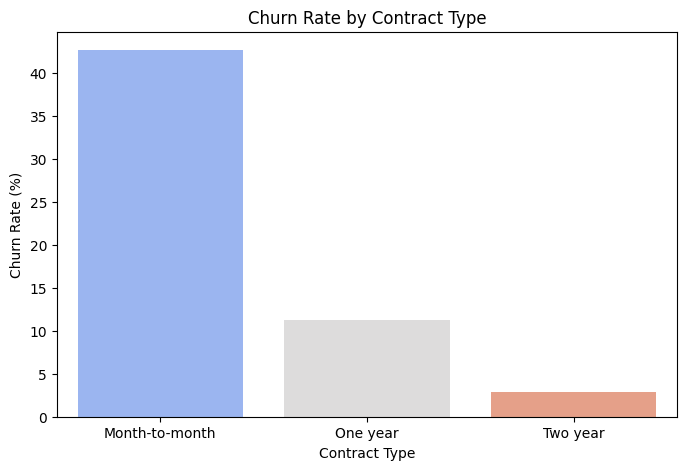

In [49]:
# Bar plot
plt.figure(figsize = (8,5))
sns.barplot(x ="Contract", y ="churn_rate", hue="Contract", data = df_contract, palette = "coolwarm", legend=False)
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Churn Rate (%)")
plt.show()

## Subplots on Churn Rate by Internet Service Type, Payment Method, Monthly Charges, and Tenure Group

In [50]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
# Connecting to SQL database
conn = sqlite3.connect("../Database/customer_churn.db")

In [52]:
# Queries for different churn factors
queries = {
    "Internet Service": """
        SELECT InternetService,
            ROUND(100.0 * SUM(CASE WHEN churn = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2)AS churn_rate
        FROM Customers
        GROUP BY InternetService
        ORDER BY churn_rate DESC;
    """,
    "Payment Method": """
        SELECT PaymentMethod,
            ROUND(100.0 * SUM(CASE WHEN churn = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2)AS churn_rate
        FROM Customers
        GROUP BY PaymentMethod
        ORDER BY churn_rate DESC;
    """,
    "Monthly Charges": """
        SELECT
            CASE
                WHEN MonthlyCharges < 30 THEN 'Low ($0 - $30)'
                WHEN MonthlyCharges BETWEEN 30 AND 60 THEN 'Medium ($30 - 60)'
                ELSE 'High ($60+)'
            END AS Charge_group,
            ROUND(100.0 * SUM(CASE WHEN churn = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2)AS churn_rate
        FROM Customers
        GROUP BY PaymentMethod
        ORDER BY churn_rate DESC;
    """,
    "Tenure Group": """
        SELECT
            CASE
                WHEN tenure <= 12 THEN '0-1 year'
                WHEN tenure BETWEEN 13 AND 24 THEN '1-2 years'
                WHEN tenure BETWEEN 25 AND 48 THEN '2-4 years'
                ELSE '4+ years' 
            END AS tenure_group,
            ROUND(100.0 * SUM(CASE WHEN churn = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2)AS churn_rate
        FROM Customers
        GROUP BY tenure_group
        ORDER BY churn_rate DESC;
    """,
}

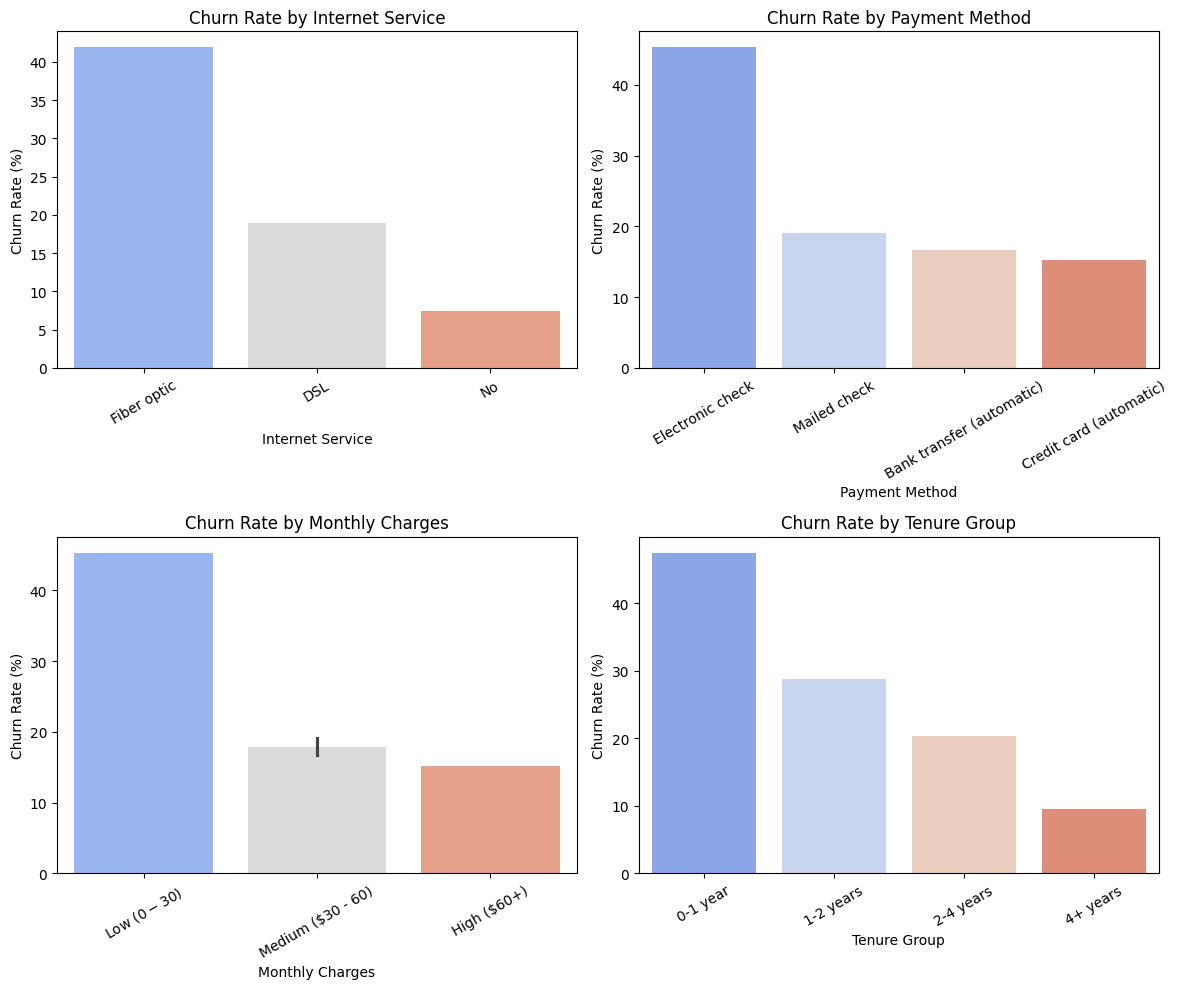

In [53]:
# Creating a figure with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize = (12, 10))

# Flatten axes for easy iteration
axes = axes.flatten()

# Iterate through queries and create plots
for i, (title, query) in enumerate(queries.items()):
    df = pd.read_sql(query, conn)
    sns.barplot(x=df.columns[0], y="churn_rate", hue = df.columns[0], data=df, ax=axes[i], palette="coolwarm", legend = False)
    axes[i].set_title(f"Churn Rate by {title}")
    axes[i].set_xlabel(title)
    axes[i].set_ylabel("Churn Rate (%)")
    axes[i].tick_params(axis="x", rotation=30)

# Close connection
conn.close()

# Adjusting the layout
plt.tight_layout()
plt.show()